# TopSBM: Topic Modeling with Stochastic Block Models

In [2]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

import numpy as np
from matplotlib import pyplot as plt

gt.seed_rng(42) ## seed for graph-tool's random number generator --> same results

In [3]:
print(gt.openmp_get_num_threads())

4


# Fitting the model

In [4]:
## we create an instance of the sbmtm-class
model = sbmtm()

In [5]:
## we can also skip the previous step by saving/loading a graph
#model.save_graph(filename = 'graph.xml.gz')
model.load_graph(filename = 'graph.xml.gz')

In [ ]:
model.g

<Graph object, undirected, with 3945 vertices and 312973 edges at 0x7f9b41167cc0>

In [ ]:
model.fit()
#model.fit_overlap()

In [9]:
state = model.state

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

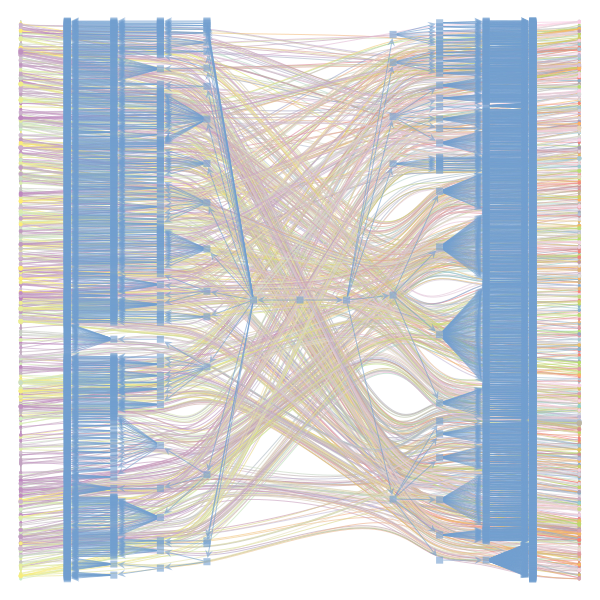

In [10]:
model.plot(nedges=1000)

In [11]:
state.draw(layout='bipartite', output='bipartite_overlap.png')
#state.draw(output='circular_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9b41167cc0, at 0x7f9af9ee6518>,
 <Graph object, directed, with 7714 vertices and 7713 edges at 0x7f9af9eed7b8>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9af9eed7b8, at 0x7f9af9ee67f0>)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [37]:
l=3

In [14]:
model.topics(l=l,n=200)

{0: [('ENSG00000006659', 0.306658521686011),
  ('ENSG00000182613', 0.21441661576053758),
  ('ENSG00000204671', 0.19792302993280392),
  ('ENSG00000096264', 0.18998167379352474),
  ('ENSG00000147262', 0.08918753817959682),
  ('ENSG00000206104', 0.0018326206475259622)],
 1: [('ENSG00000182447', 0.3516014234875445),
  ('ENSG00000008197', 0.3366548042704626),
  ('ENSG00000214978', 0.3117437722419929)],
 2: [('ENSG00000134389', 0.30255941499085925),
  ('ENSG00000125255', 0.26508226691042047),
  ('ENSG00000044012', 0.22440585009140768),
  ('ENSG00000072080', 0.15082266910420475),
  ('ENSG00000241224', 0.05712979890310786)],
 3: [('ENSG00000126752', 0.15943027796921663),
  ('ENSG00000046774', 0.15116011945784516),
  ('ENSG00000221867', 0.14771422007810706),
  ('ENSG00000198681', 0.13507925568573398),
  ('ENSG00000197172', 0.13094417643004824),
  ('ENSG00000158639', 0.11164713990351481),
  ('ENSG00000205777', 0.08890420399724328),
  ('ENSG00000214107', 0.07512060647829083)],
 4: [('ENSG00000206

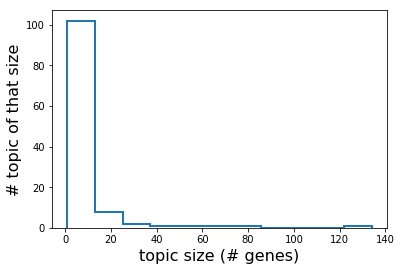

In [15]:
topic_lenghts = []
for topic in model.topics(l=l,n=2000):
    topic_lenghts.append(len(model.topics(l=l,n=2000)[topic]))
    
fig=plt.figure()
plt.hist(topic_lenghts, histtype='step', bins=11, lw=2)
plt.xlabel("topic size (# genes)", fontsize=16)
plt.ylabel("# topic of that size", fontsize=16)
plt.show()
fig.savefig("topic_size_%d.png"%l)

In [53]:
for ensg in model.topics(l=3,n=200)[10]:
    print(ensg[0])

ENSG00000204876
ENSG00000163646
ENSG00000104499
ENSG00000173612
ENSG00000244122
ENSG00000203985
ENSG00000171201
ENSG00000182793
ENSG00000205649


In [45]:
for ensg in model.words:
    print(ensg)

ENSG00000006659
ENSG00000008197
ENSG00000044012
ENSG00000046774
ENSG00000054796
ENSG00000068985
ENSG00000069206
ENSG00000071677
ENSG00000072080
ENSG00000075388
ENSG00000080572
ENSG00000080910
ENSG00000081800
ENSG00000088782
ENSG00000094661
ENSG00000096264
ENSG00000099721
ENSG00000101074
ENSG00000101435
ENSG00000101441
ENSG00000101446
ENSG00000102021
ENSG00000102055
ENSG00000102076
ENSG00000102243
ENSG00000102794
ENSG00000104499
ENSG00000104755
ENSG00000104818
ENSG00000105198
ENSG00000105370
ENSG00000105954
ENSG00000106304
ENSG00000106331
ENSG00000106410
ENSG00000106436
ENSG00000108417
ENSG00000108702
ENSG00000108849
ENSG00000109181
ENSG00000109208
ENSG00000109851
ENSG00000111049
ENSG00000111241
ENSG00000111701
ENSG00000112115
ENSG00000112116
ENSG00000112337
ENSG00000112462
ENSG00000115488
ENSG00000116218
ENSG00000116721
ENSG00000116726
ENSG00000116996
ENSG00000118434
ENSG00000118972
ENSG00000120054
ENSG00000120211
ENSG00000120242
ENSG00000120289
ENSG00000120436
ENSG00000120563
ENSG0000

ENSG00000186723
ENSG00000186788
ENSG00000186795
ENSG00000186803
ENSG00000186860
ENSG00000186881
ENSG00000186895
ENSG00000186924
ENSG00000186925
ENSG00000186930
ENSG00000186943
ENSG00000186965
ENSG00000186967
ENSG00000186970
ENSG00000186971
ENSG00000186977
ENSG00000186980
ENSG00000187005
ENSG00000187026
ENSG00000187080
ENSG00000187082
ENSG00000187170
ENSG00000187172
ENSG00000187175
ENSG00000187238
ENSG00000187272
ENSG00000187516
ENSG00000187533
ENSG00000187545
ENSG00000187612
ENSG00000187689
ENSG00000187701
ENSG00000187733
ENSG00000187754
ENSG00000187766
ENSG00000187806
ENSG00000187821
ENSG00000187857
ENSG00000187918
ENSG00000187969
ENSG00000188120
ENSG00000188155
ENSG00000188219
ENSG00000188324
ENSG00000188334
ENSG00000188340
ENSG00000188408
ENSG00000188558
ENSG00000188655
ENSG00000188691
ENSG00000188694
ENSG00000188784
ENSG00000188877
ENSG00000188909
ENSG00000189023
ENSG00000189037
ENSG00000189052
ENSG00000189064
ENSG00000189090
ENSG00000189132
ENSG00000189139
ENSG00000189169
ENSG0000

### DAVID compatible format

In [38]:
model.print_topics(l=l, format='tsv')

## Topic-distribution in each document
Which topics contribute to each document?

In [18]:
## select a document (by its index)
i_doc = 814
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
#model.topicdist(i_doc,l=0)

GTEX-13QJC-0626-SM


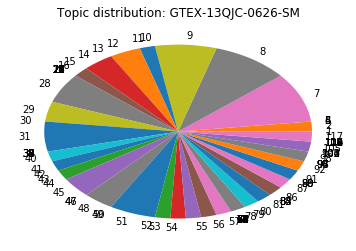

In [19]:
data = [el[1] for el in model.topicdist(i_doc,l=l)]
labels = [el[0]+1 for el in model.topicdist(i_doc,l=l)]
fig=plt.figure()
plt.pie(data, labels=labels)
plt.title("Topic distribution: %s"%model.documents[i_doc])
plt.show()
fig.savefig("topic_distr_%s.png"%model.documents[i_doc])

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [55]:
model.clusters(l=l,n=500)

{0: [('GTEX-1117F-0226-SM', 1.0),
  ('GTEX-XBEC-1826-SM-', 1.0),
  ('GTEX-1313W-1626-SM', 1.0),
  ('GTEX-X4LF-1726-SM-', 1.0),
  ('GTEX-1B8KZ-1026-SM', 1.0),
  ('GTEX-13113-1126-SM', 1.0),
  ('GTEX-13112-1126-SM', 1.0),
  ('GTEX-13111-2126-SM', 1.0),
  ('GTEX-13111-1726-SM', 1.0),
  ('GTEX-13111-0626-SM', 1.0),
  ('GTEX-1AYCT-1126-SM', 1.0),
  ('GTEX-14BIM-1626-SM', 1.0),
  ('GTEX-1AX9K-0926-SM', 1.0),
  ('GTEX-XAJ8-0226-SM-', 1.0),
  ('GTEX-XAJ8-0926-SM-', 1.0),
  ('GTEX-1AX9I-1726-SM', 1.0),
  ('GTEX-1AX8Z-1626-SM', 1.0),
  ('GTEX-12WSL-1126-SM', 1.0),
  ('GTEX-XBEW-1726-SM-', 1.0),
  ('GTEX-XGQ4-0626-SM-', 1.0),
  ('GTEX-14BMU-0626-SM', 1.0),
  ('GTEX-XGQ4-2426-SM-', 1.0),
  ('GTEX-14BMU-2426-SM', 1.0),
  ('GTEX-1AMFI-2426-SM', 1.0),
  ('GTEX-1AMFI-1026-SM', 1.0),
  ('GTEX-12ZZW-2326-SM', 1.0),
  ('GTEX-XLM4-1026-SM-', 1.0),
  ('GTEX-12ZZW-0426-SM', 1.0),
  ('GTEX-1AMEY-0526-SM', 1.0),
  ('GTEX-1A8G7-1226-SM', 1.0),
  ('GTEX-1A8G7-0426-SM', 1.0),
  ('GTEX-14C38-1026-SM', 1.0),
  ('G

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [43]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
for sample in model.clusters_query(i_doc,l=1):
    print(sample[1])

2 GTEX-1117F-0626-SM
GTEX-11ONC-1126-SM
GTEX-13RTJ-0626-SM
GTEX-13S7M-2226-SM
GTEX-13U4I-0926-SM
GTEX-17F9Y-1426-SM
GTEX-PWCY-0426-SM-
GTEX-ZV7C-0426-SM-


# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

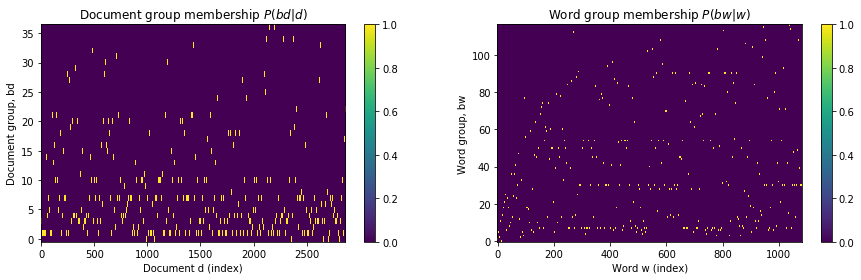

In [20]:
l=l
p_td_d,p_tw_w = model.group_membership(l=l)
fig = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()
plt.show()

In [21]:
fig.savefig("group_membership_%d.pdf"%l)
fig.savefig("group_membership_%d.png"%l)

In [22]:
overlaplenghts=[]
overlap_index = []
for i,el in enumerate(p_tw_w.T):
    mixture_size = len(np.nonzero(el)[0])
    overlaplenghts.append(mixture_size)
    if mixture_size>1:
        overlap_index.append(i)

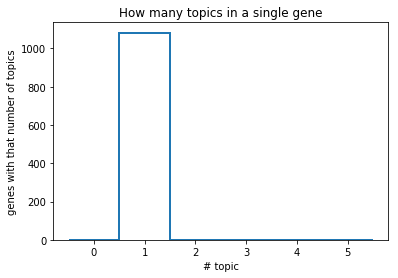

In [23]:
fig=plt.figure()
plt.title("How many topics in a single gene")
plt.xlabel("# topic")
plt.ylabel("genes with that number of topics")
plt.hist(overlaplenghts, histtype='step', lw=2, range=(-0.5,5.5), bins=6)
plt.show()
fig.savefig("overlap_size_%d.png"%l)

In [24]:
gene=300
for gene in overlap_index[:10]:
    fig=plt.figure()
    plt.title("Topic distribution of a single gene: %s"%model.words[gene])
    plt.xlabel("topic tw")
    plt.ylabel("probability")
    plt.ylim((0,1.1))
    plt.plot(p_tw_w.T[gene])
    plt.show()
    fig.savefig("distribution_single_gene_%s.png"%model.words[gene])

## overlapping genes

In [25]:
#get genes overlapping
overlappinggenes = []
for i,el in enumerate(p_tw_w.T):
    if(len(np.nonzero(el)[0])>1):
        overlappinggenes.append(model.words[i])

In [26]:
for g in overlappinggenes:
    print(g)

# state analysis

In [27]:
state = model.state

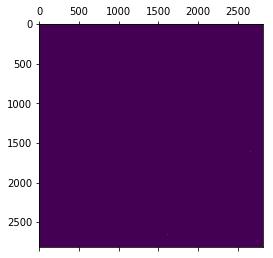

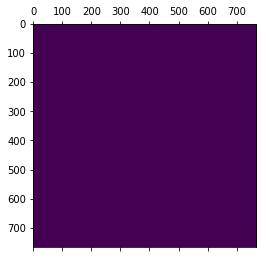

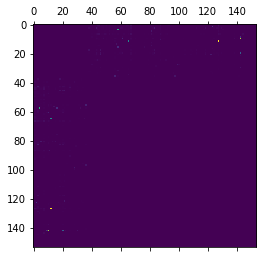

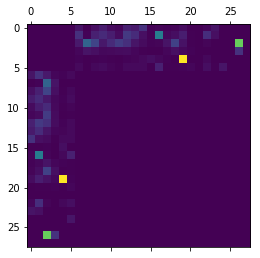

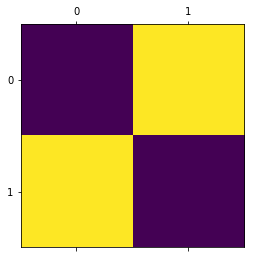

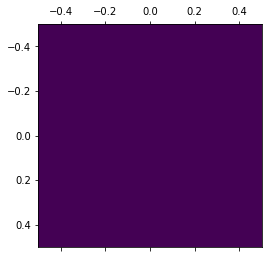

In [28]:
for level in state.get_levels():
    e=level.get_matrix()
    plt.matshow(e.todense())
    plt.savefig("mat_%d.png"%l)

In [29]:
for i in range(len(state.get_levels())-2)[::-1]:
    print("doing %d"%i)
    model.print_topics(l=i)

doing 3
doing 2
doing 1
doing 0


In [30]:
model.print_summary()

In [31]:
print(len(model.words))
print(len(model.documents))

1082
2863


### topicdist

In [32]:
groups = model.groups[l]

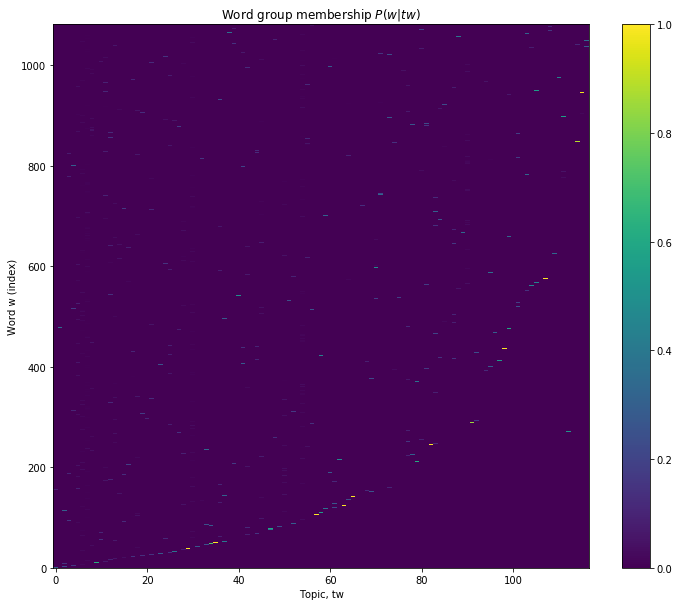

In [33]:
p_w_tw = groups['p_w_tw']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(w | tw)$')
plt.xlabel('Topic, tw')
plt.ylabel('Word w (index)')
plt.colorbar()
fig.savefig("p_w_tw_%d.png"%l)

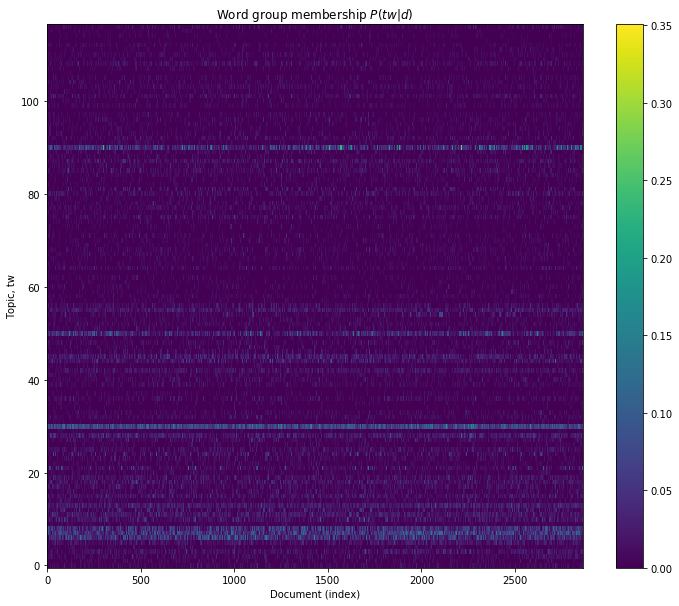

In [34]:
p_tw_d = groups['p_tw_d']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(tw | d)$')
plt.xlabel('Document (index)')
plt.ylabel('Topic, tw')
plt.colorbar()
fig.savefig("p_tw_d_%d.png"%l)

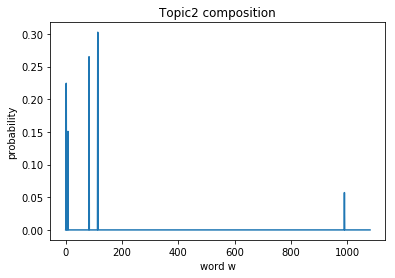

In [35]:
topic=2
fig=plt.figure()
plt.title("Topic%d composition"%topic)
plt.xlabel("word w")
plt.ylabel("probability")
plt.plot(p_w_tw.T[topic])
plt.show()
fig.savefig("Topic%d_composition.png"%topic)

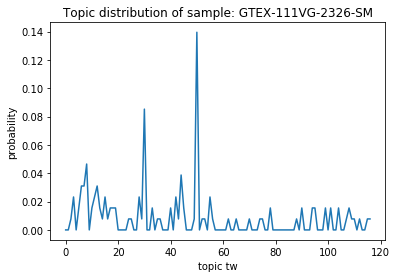

In [36]:
doc=12
title = model.documents[doc]
fig=plt.figure()
plt.title("Topic distribution of sample: %s"%title)
plt.xlabel("topic tw")
plt.ylabel("probability")
plt.plot(p_tw_d.T[doc])
plt.show()
fig.savefig("distribution_single_sample_%d.png"%doc)